# PDF_CDF_And_Normal_Distrobution

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../Data/Titanic.csv')

## Probability Distribution Function (PDF)
   - PDFs have a similar pattern to histogram. The only difference is that we normalize the value of histograms
   - Let's plot the histogram for Age in our Titanic dataset
   - To visualize this data, we'll use the seaborn library

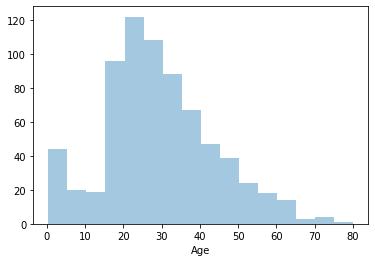

In [2]:
sns.distplot(df['Age'].dropna(), hist=True, kde=False, bins=16)

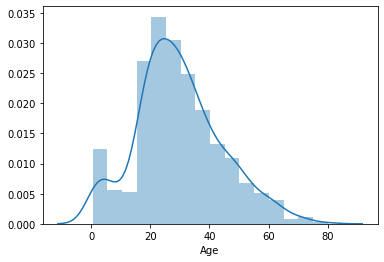

In [3]:
sns.distplot(df['Age'].dropna(), hist=True, kde=True, bins=16)

### Activity: What percent of passengers are younger than 40?¶

In [4]:
# Find the number of passengers younger than 40
How_many_younger_40 = df[df['Age'] <= 40]
# Find the percentage of passengers who are younger than 40
# Do this by dividing the number of passengers younger than 40 by the total number of passengers (with an age)
pr_below_40 = len(How_many_younger_40)/len(df['Age'].dropna())
pr_below_40

0.7899159663865546

## Cumulative Density Function (CDF)
   - In above example, we could not easily obtain the percentage from a PDF, although it is possible.
   - This is much easier if we use a CDF. A CDF calculates the probability that a random variable is less than a
      threshold value
   - Let's learn CDF by example: given an array of numbers (our random variable) and a threshold value as input:

        1. Find the minimum value in the array
        2. Set the threshold to be the minimum value of the array
        3. For a given array of numbers and a given threshold, count all of the elements in the array that are less
           than the threshold, and divide that count by the length of the array
        4. Repeat step three, increasing the threshold by one, until you go through step three where threshold is
           equail to the maximum value in the array


In [5]:
def count_lower(x, threshold):
    return np.sum(x <= threshold)

ls_age = df['Age'].dropna().values
cdf_age = [count_lower(ls_age, r)/len(ls_age) for r in range(int(np.min(ls_age)), int(np.max(ls_age)))]

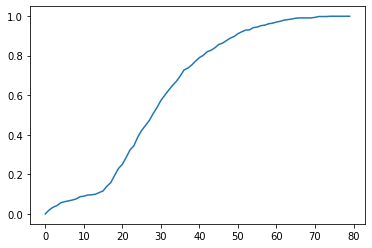

In [6]:
plt.plot(range(int(np.min(ls_age)), int(np.max(ls_age))), cdf_age)


## Normal Distribution
   - It is possible that when we plot a histogram or PDF of an array, it has a Bell Shape
   - The name of this histogram is Normal

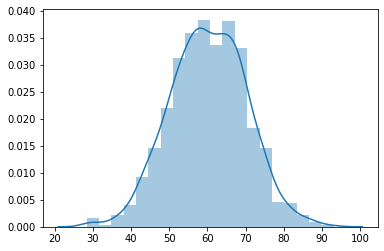

In [7]:
a = np.random.normal(60, 10, 1000)
sns.distplot(a, hist=True, kde=True, bins=20)

### Activity: The intrsuctor of DS graded last term's final exam. They are reporting that the mean was 60 (with scale of 100) with standard deviation of 10. What is the probability that students got more than 70?

#### Here we see that the survival factor is the same as 1 minus the total cdf below 70

In [8]:
from scipy.stats import norm

print(norm.sf(70, loc=60, scale=10))
# Or
print(1 - norm.cdf(70, loc=60, scale=10))

0.15865525393145707
0.15865525393145707


## Normal Distribution Properties:
   When the data is Normally distributed:

   - 68% of the data is captured within one standard deviation from the mean.
   - 95% of the data is captured within two standard deviations from the mean.
   - 99.7% of the data is captured within three standard deviations from the mean.

### Activity: Show that about 68% of the values are in the [50, 70] range

In [9]:
norm.cdf(70, loc=60, scale=10) - norm.cdf(50, loc=60, scale=10)

0.6826894921370859

## Scaling the Normal Distribution to get Unit STD
   - For any normal distrobuted list, if we subtract all of elements from its mean and then divide by it's std then the new list has a zero mean and a std of one 

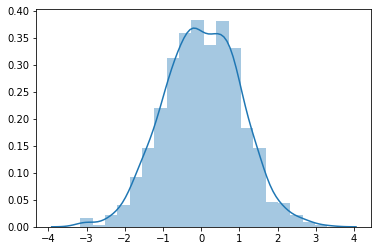

In [10]:
b = (a - 60)/10
sns.distplot(b, hist=True, kde=True, bins=20)

# Z-Distribution
   - Z-distribution is another name for standard Normal distribution
   - When the samples of our numerical array are Normal with an arbitrary mean and std
   - if we subtract all of the elements from its mean and then divide by it's std then the new list has a zero mean and a std of one 